In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel(r"C:\Users\prajw\Data Science\Assignments\18 Forcasting\Airlines+Data.xlsx")

In [3]:
df=data.copy()

In [4]:
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [5]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [7]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Month,96,1998-12-16 05:00:00,1995-01-01 00:00:00,1996-12-24 06:00:00,1998-12-16 12:00:00,2000-12-08 18:00:00,2002-12-01 00:00:00,NaN
Passengers,96.0,213.708333,104.0,156.0,200.0,264.75,413.0,71.918216


In [8]:
df.shape

(96, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


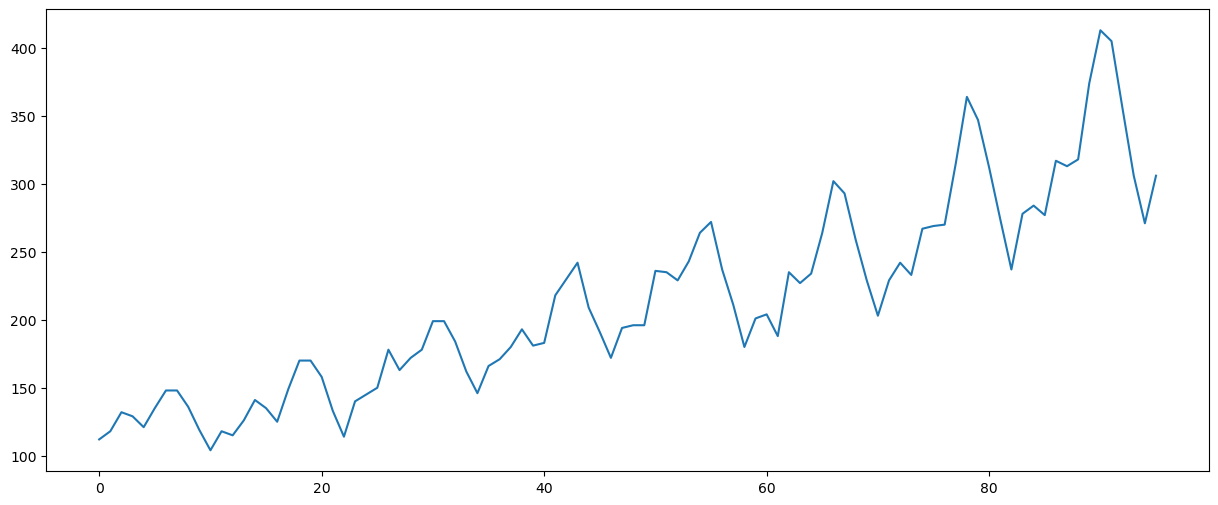

In [10]:
df["Passengers"].plot(figsize=(15,6))
plt.show()

In [11]:
df['Date'] = pd.to_datetime(df.Month,format="%Y-%M")

# To extract Month
df['month'] = df.Date.dt.strftime("%b")

# To extract Year
df['year'] = df.Date.dt.strftime("%Y")

In [12]:
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [13]:
month_dummies = pd.DataFrame(pd.get_dummies(df['month']))

In [14]:
month_dummies

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
91,False,True,False,False,False,False,False,False,False,False,False,False
92,False,False,False,False,False,False,False,False,False,False,False,True
93,False,False,False,False,False,False,False,False,False,False,True,False
94,False,False,False,False,False,False,False,False,False,True,False,False


In [15]:
df = pd.concat([df,month_dummies], axis = 1)
df

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1995-01-01,Jan,1995,False,False,False,False,True,False,False,False,False,False,False,False
1,1995-02-01,118,1995-02-01,Feb,1995,False,False,False,True,False,False,False,False,False,False,False,False
2,1995-03-01,132,1995-03-01,Mar,1995,False,False,False,False,False,False,False,True,False,False,False,False
3,1995-04-01,129,1995-04-01,Apr,1995,True,False,False,False,False,False,False,False,False,False,False,False
4,1995-05-01,121,1995-05-01,May,1995,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,False,True,False,False,False,False,False,False,False,False,False,False
92,2002-09-01,355,2002-09-01,Sep,2002,False,False,False,False,False,False,False,False,False,False,False,True
93,2002-10-01,306,2002-10-01,Oct,2002,False,False,False,False,False,False,False,False,False,False,True,False
94,2002-11-01,271,2002-11-01,Nov,2002,False,False,False,False,False,False,False,False,False,True,False,False


In [16]:
'''def t_score(x) :
    mean=df['Passengers'].mean()
    std=df['Passengers'].std()
    n=df['Passengers'].count()
    t=(x-mean)/std/(n**.5)
    return t
l=[]
for i in range(96):
    x=df['Passengers'][i]
    l.append(t_score(x))
dt['t']=l'''

"def t_score(x) :\n    mean=df['Passengers'].mean()\n    std=df['Passengers'].std()\n    n=df['Passengers'].count()\n    t=(x-mean)/std/(n**.5)\n    return t\nl=[]\nfor i in range(96):\n    x=df['Passengers'][i]\n    l.append(t_score(x))\ndt['t']=l"

In [17]:
df['t'] = np.arange(1,97)

df['t_squared'] = df['t']*df['t']

df.columns

df['log_Passengers'] = np.log(df['Passengers'])

<Axes: xlabel='year', ylabel='Passengers'>

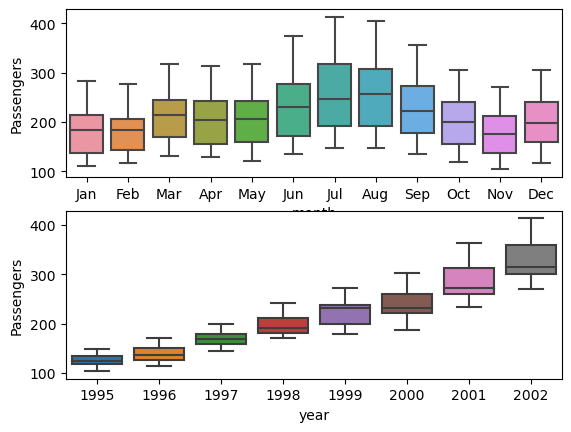

In [18]:
plt.subplot(211)
sns.boxplot(x = 'month', y = 'Passengers', data = df)

plt.subplot(212)
sns.boxplot(x = 'year', y = 'Passengers', data = df)

In [19]:
train = df.head(80)

test = df.tail(16)

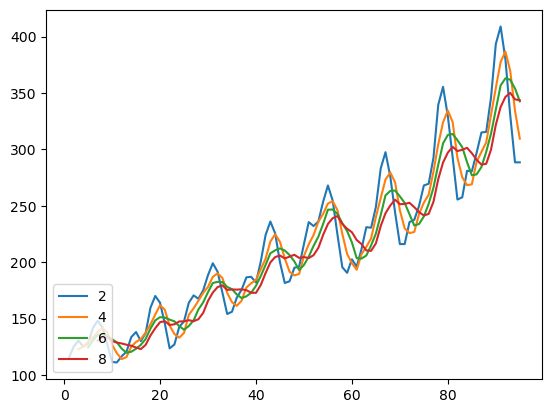

In [20]:
for i in range(2,10,2):
    df['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

In [21]:
import statsmodels.graphics.tsaplots as tsa_plots

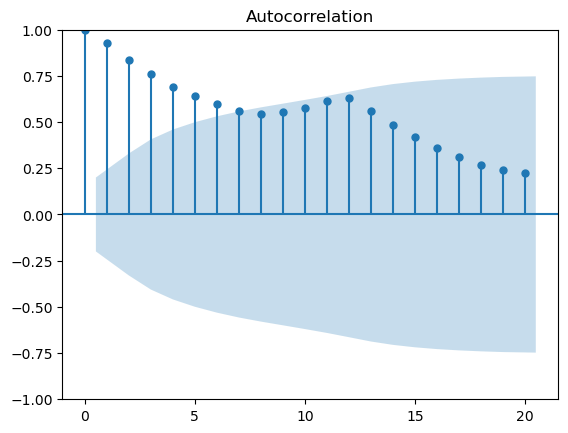

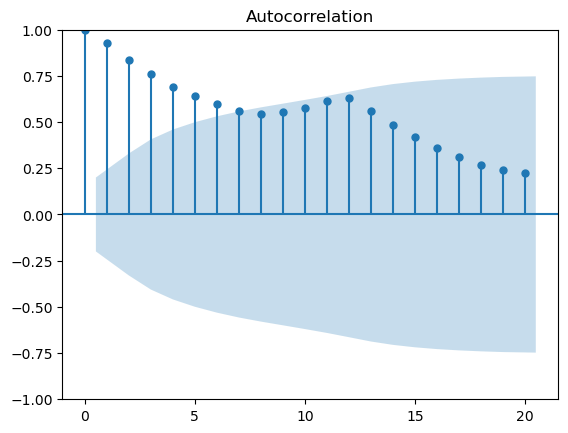

In [22]:
tsa_plots.plot_acf(df['Passengers'])

In [23]:
df=df.drop(columns=["Month","Date"])

In [24]:
train = df.head(80)

test = df.tail(16)

In [25]:
train

,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,112,Jan,1995,False,False,False,False,True,False,False,False,False,False,False,False,1,1,4.718499
1,118,Feb,1995,False,False,False,True,False,False,False,False,False,False,False,False,2,4,4.770685
2,132,Mar,1995,False,False,False,False,False,False,False,True,False,False,False,False,3,9,4.882802
3,129,Apr,1995,True,False,False,False,False,False,False,False,False,False,False,False,4,16,4.859812
4,121,May,1995,False,False,False,False,False,False,False,False,True,False,False,False,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,269,Apr,2001,True,False,False,False,False,False,False,False,False,False,False,False,76,5776,5.594711
76,270,May,2001,False,False,False,False,False,False,False,False,True,False,False,False,77,5929,5.598422
77,315,Jun,2001,False,False,False,False,False,False,True,False,False,False,False,False,78,6084,5.752573
78,364,Jul,2001,False,False,False,False,False,True,False,False,False,False,False,False,79,6241,5.897154


In [26]:
test=test.reset_index(drop=True)
test

,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,312,Sep,2001,False,False,False,False,False,False,False,False,False,False,False,True,81,6561,5.743003
1,274,Oct,2001,False,False,False,False,False,False,False,False,False,False,True,False,82,6724,5.613128
2,237,Nov,2001,False,False,False,False,False,False,False,False,False,True,False,False,83,6889,5.468060
3,278,Dec,2001,False,False,True,False,False,False,False,False,False,False,False,False,84,7056,5.627621
4,284,Jan,2002,False,False,False,False,True,False,False,False,False,False,False,False,85,7225,5.648974
5,277,Feb,2002,False,False,False,True,False,False,False,False,False,False,False,False,86,7396,5.624018
6,317,Mar,2002,False,False,False,False,False,False,False,True,False,False,False,False,87,7569,5.758902
7,313,Apr,2002,True,False,False,False,False,False,False,False,False,False,False,False,88,7744,5.746203
8,318,May,2002,False,False,False,False,False,False,False,False,True,False,False,False,89,7921,5.762051
9,374,Jun,2002,False,False,False,False,False,False,True,False,False,False,False,False,90,8100,5.924256


In [27]:
import statsmodels.formula.api as smf

In [28]:
linear_model = smf.ols('Passengers~t', data = train).fit()
pred_linear  = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear  = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
print("Root Mean Square Error : ",rmse_linear)

Root Mean Square Error :  47.542624067726734


In [29]:
Exp = smf.ols('log_Passengers~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

43.79373939334322

In [30]:
Quad = smf.ols('Passengers~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_Quad))**2))
print("Root Mean Square Error : ",rmse_Quad)

Root Mean Square Error :  43.65440369584249


In [31]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

129.2664764144331

In [32]:
add_sea_quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
print("Root Mean Square Error : ",rmse_add_sea_quad)

Root Mean Square Error :  23.910983570104204


In [33]:
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

135.3264841462108

In [34]:
Mul_sea_exp = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_sea_exp = pd.Series(Mul_sea_exp.predict(test))
rmse_Mult_sea_exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_sea_exp)))**2))
rmse_Mult_sea_exp

9.469000230306555

In [35]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_sea_exp"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_sea_exp])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_sea_exp,9.469000
4,rmse_add_sea_quad,23.910984
2,rmse_Quad,43.654404
1,rmse_Exp,43.793739
0,rmse_linear,47.542624
3,rmse_add_sea,129.266476
5,rmse_Mult_sea,135.326484


In [36]:
final_model = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()

In [37]:
pred_new = pd.Series(final_model.predict(df))
pred_new

0     4.693857
1     4.709450
2     4.853814
3     4.818083
4     4.808364
        ...   
91    5.971032
92    5.861712
93    5.734631
94    5.605119
95    5.740344
Length: 96, dtype: float64

In [38]:
df["forecasted_Passengers"] = pd.Series(np.exp(pred_new))

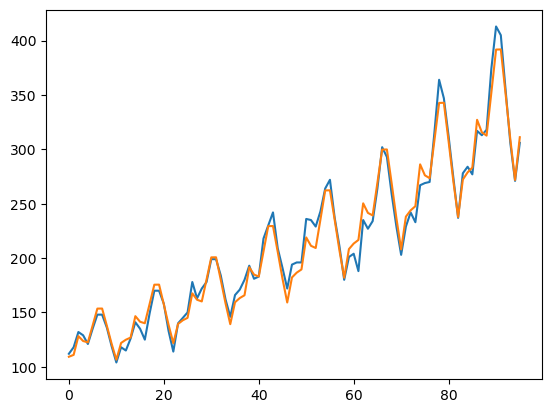

In [39]:
plt.plot(df[['Passengers','forecasted_Passengers']].reset_index(drop=True))